Hola &#x1F600;

Soy **Hesus Garcia**  como "Jesús" pero con H. Sé que puede ser confuso al principio, pero una vez que lo recuerdes, ¡nunca lo olvidarás! &#x1F31D;	. Como revisor de código de Triple-Ten, estoy emocionado de examinar tus proyectos y ayudarte a mejorar tus habilidades en programación. si has cometido algún error, no te preocupes, pues ¡estoy aquí para ayudarte a corregirlo y hacer que tu código brille! &#x1F31F;. Si encuentro algún detalle en tu código, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;

# Descripción del Proyecto Final

# Condiciones de la asignación principal

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

# Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
Internet. La red se puede configurar a través de una línea telefónica (DSL, línea de abonado digital) o a través de un cable de fibra óptica.
Algunos otros servicios que ofrece la empresa incluyen:

Seguridad en Internet: software antivirus (ProtecciónDeDispositivo) y un bloqueador de sitios web maliciosos (SeguridadEnLínea).
Una línea de soporte técnico (SoporteTécnico).
Almacenamiento de archivos en la nube y backup de datos (BackupOnline).
Streaming de TV (StreamingTV) y directorio de películas (StreamingPelículas)
La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

# Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- contract.csv — información del contrato;
- personal.csv — datos personales del cliente;
- internet.csv — información sobre los servicios de Internet;
- phone.csv — información sobre los servicios telefónicos.

En cada archivo, la columna customerID (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

# Tabla de Contenido 
* [Descripción del Proyecto](#description)
* [Descripción de los Datos](#data)
* [Paso 1. Carga de Datos](#understanding)
* [Paso 2. Preprocesamiento de Data](#preprocessing)
* [Paso 3. Análisis Exploratorio](#eda)
* [Paso 4. Entrenamiento del Modelo](#modeltrain)  
* [Paso 5. Testing Final](#test)
* [ Paso 6. Conclusiones](#allconclusion)

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Considera la posibilidad de incluir una tabla de contenidos al inicio de tu proyecto. Esto no solo mejorará la estructura y presentación de tu análisis, sino que también facilitará la navegación y comprensión de los distintos temas tratados, especialmente para proyectos extensos con múltiples secciones y subsecciones. Una tabla de contenidos bien organizada puede mejorar significativamente la experiencia del lector y destacar la profesionalidad de tu trabajo.
</div>


## Carga de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

In [2]:
contract=pd.read_csv('/datasets/final_provider/contract.csv')
personal=pd.read_csv('/datasets/final_provider/personal.csv')
internet=pd.read_csv('/datasets/final_provider/internet.csv')
phone=pd.read_csv('/datasets/final_provider/phone.csv')

In [3]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


- BeginDate y EndDate deben ser de tipo datetime. Type, PaperlessBilling y PaymentMethod deben ser de tipo category. CustomerID puede permanecer como está y el total de cargos puede cambiarse a flotante

In [5]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


- Todas las columnas deben cambiarse al tipo categórico, menos la de customerID

In [7]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


- Nuevamente solo customerID se mantendrá igual, y también veo que en ésta hay menos filas, lo que significa que no todos los clientes están abonados al servicio de Internet

In [9]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [10]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


- Parece que estas últimas tablas tienen menos filas que las dos primeras. Además, la columna 'MultipleLines' necesita convertirse en una categórica.  Al final, voy a tener que unir todas estas tablas, pero como no tienen la misma cantidad de filas, seguramente faltarán algunos datos.

## Preprocesamiento de Datos

- Convertiré "TotalCharges" a decimales.
- Cambiaré algunas columnas a formato categórico.
- En "EndDate", "No" significará que el cliente no se fue.
- Crearé una columna "churn": 0 si se queda, 1 si se va.
- Esta columna "churn" es nuestro objetivo principal.

- Información de Contrato

In [11]:
contract['Type']=contract['Type'].astype('category')
contract['PaperlessBilling']=contract['PaperlessBilling'].astype('category')
contract['PaymentMethod']=contract['PaymentMethod'].astype('category')
contract['TotalCharges']=pd.to_numeric(contract['TotalCharges'], errors='coerce')
contract['churn'] = (contract['EndDate'] != "No").astype("int")

- También puedo crear una columna llamada 'days' para ver cuánto tiempo estuvieron los clientes con nosotros. Para eso, voy a sacar la diferencia entre la 'EndDate' y la 'BeginDate. Por ahora estas fechas están como texto. Lo que haré es reemplazar todos los 'No' en 'EndDate' por el día en que tomamos los datos, que fue el 1 de febrero de 2020. Los pondré en el mismo formato que tienen las otras fechas (2020-02-01 00:00:00) para que sea más fácil convertir la columna a un formato de fecha y hora. Ya con esto podré calcular la diferencia entre fechas y guardarla en la nueva columna 'days'.

In [12]:
contract['EndDate']=contract['EndDate'].replace('No','2020-02-01 00:00:00')
contract['BeginDate']=pd.to_datetime(contract['BeginDate'], format='%Y-%m-%d')
contract['EndDate']=pd.to_datetime(contract['EndDate'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   category      
 4   PaperlessBilling  7043 non-null   category      
 5   PaymentMethod     7043 non-null   category      
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   churn             7043 non-null   int64         
dtypes: category(3), datetime64[ns](2), float64(2), int64(1), object(1)
memory usage: 351.3+ KB


In [13]:
contract['days']=(contract['EndDate'] - contract['BeginDate']).dt.days
contract['days'].unique()

array([  31, 1036,   61, 1371,  245,  671,  306,  853, 1888,  396,  488,
       1767, 1491,  761, 2102, 1584, 2163,  304,  641,   30,  365, 1492,
        914, 1431, 2191,  518,   62,  822,  153, 1401, 1033,  335, 2132,
       1918, 1310,  456, 1826,  549, 2010, 1432,  275,   92,  945, 1523,
       1949, 1706,  337,  214, 1279,  276, 1067, 1461,  883, 1979, 1157,
       2071,  975, 1675, 1126, 1095,  303, 1248,  184,   91,  215,  123,
       1006, 2041,  702, 1737,  242, 1857,  457,  427,  610, 1614,  395,
       1218, 1798,  730, 1340,  579,  122, 1645, 1553,  580, 1795,  487,
       1583,  548,  974, 1156, 1309, 1917,  640,  760,  334, 2101,  669,
       1676, 1856,  792,  852,    0, 1217,  699, 1186, 1065, 1703,  273,
        607, 1003, 1369,  609, 1005, 1399, 1887, 1187, 1765, 2129,  638,
       1522,  183, 1064, 1338, 2160,  972,  244,  791,  426, 1125, 1796,
       2130, 1034, 1430,  913, 2040, 1278, 1400, 2009,  944, 1734, 2099,
       1764,  700,  668, 1736, 1370, 1644, 2070,  8

- Elimino las columnas "date" porque ya no me sirven

In [14]:
contract_final=contract.drop(['BeginDate', 'EndDate'], axis=1)

- Elimino las filas con valores que faltan al cambiar TotalCharges a tipo float

In [15]:
contract_final.dropna(inplace=True)

In [16]:
contract_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   Type              7032 non-null   category
 2   PaperlessBilling  7032 non-null   category
 3   PaymentMethod     7032 non-null   category
 4   MonthlyCharges    7032 non-null   float64 
 5   TotalCharges      7032 non-null   float64 
 6   churn             7032 non-null   int64   
 7   days              7032 non-null   int64   
dtypes: category(3), float64(2), int64(2), object(1)
memory usage: 350.7+ KB


- Ahora paso a Personal Information. Como se mencionó antes, cambio las columnas a tipo categórico, menos las de customerID

In [17]:
personal['gender']=personal['gender'].astype('category')
personal['Partner'] = personal['Partner'].astype("category")
personal['Dependents'] = personal['Dependents'].astype("category")
personal['SeniorCitizen'] = personal['SeniorCitizen'].astype("category")

In [18]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   customerID     7043 non-null   object  
 1   gender         7043 non-null   category
 2   SeniorCitizen  7043 non-null   category
 3   Partner        7043 non-null   category
 4   Dependents     7043 non-null   category
dtypes: category(4), object(1)
memory usage: 83.1+ KB


- No voy a convertir las columnas de las otras tablas a categorías todavía. Ya que sino, aparecerían valores NaN que tendría que reemplazar uno por uno. Para evitar eso, primero voy a fusionar las tablas. Lo haré juntándolas por la columna "customerID". Empezaré fusionando la tabla "contract_final" con la tabla "personal".

In [19]:
merge_1=pd.merge(personal, contract_final, how="left", on="customerID")
merge_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn,days
0,7590-VHVEG,Female,0,Yes,No,Month-to-month,Yes,Electronic check,29.85,29.85,0.0,31.0
1,5575-GNVDE,Male,0,No,No,One year,No,Mailed check,56.95,1889.50,0.0,1036.0
2,3668-QPYBK,Male,0,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1.0,61.0
3,7795-CFOCW,Male,0,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0.0,1371.0
4,9237-HQITU,Female,0,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1.0,61.0


- Quito los valores que faltan causados por la diferencia en el número de filas

In [20]:
merge_1.dropna(inplace=True)
merge_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   Type              7032 non-null   category
 6   PaperlessBilling  7032 non-null   category
 7   PaymentMethod     7032 non-null   category
 8   MonthlyCharges    7032 non-null   float64 
 9   TotalCharges      7032 non-null   float64 
 10  churn             7032 non-null   float64 
 11  days              7032 non-null   float64 
dtypes: category(7), float64(4), object(1)
memory usage: 378.6+ KB


In [21]:
merge_2=pd.merge(merge_1, phone, how="left", on="customerID")
merge_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn,days,MultipleLines
0,7590-VHVEG,Female,0,Yes,No,Month-to-month,Yes,Electronic check,29.85,29.85,0.0,31.0,NaN
1,5575-GNVDE,Male,0,No,No,One year,No,Mailed check,56.95,1889.50,0.0,1036.0,No
2,3668-QPYBK,Male,0,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1.0,61.0,No
3,7795-CFOCW,Male,0,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0.0,1371.0,NaN
4,9237-HQITU,Female,0,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1.0,61.0,No


In [22]:
data_final=pd.merge(merge_2, internet, how="left", on="customerID")
data_final.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn,days,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,Month-to-month,Yes,Electronic check,29.85,29.85,0.0,31.0,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,One year,No,Mailed check,56.95,1889.50,0.0,1036.0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1.0,61.0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0.0,1371.0,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1.0,61.0,No,Fiber optic,No,No,No,No,No,No


In [23]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   Type              7032 non-null   category
 6   PaperlessBilling  7032 non-null   category
 7   PaymentMethod     7032 non-null   category
 8   MonthlyCharges    7032 non-null   float64 
 9   TotalCharges      7032 non-null   float64 
 10  churn             7032 non-null   float64 
 11  days              7032 non-null   float64 
 12  MultipleLines     6352 non-null   object  
 13  InternetService   5512 non-null   object  
 14  OnlineSecurity    5512 non-null   object  
 15  OnlineBackup      5512 non-null   object  
 16  DeviceProtection  5512 n

- Cambio la columna churn a tipo entero

In [24]:
data_final['churn']=data_final['churn'].astype('int')

- Como los usuarios con valores ausentes no se suscriben a esos servicios, voy a reemplazar esos valores por "No". De esta manera, tendré información completa y precisa para seguir adelante.

In [25]:
str_cols = data_final.columns[data_final.dtypes=='object']
data_final[str_cols] = data_final[str_cols].fillna('No')

In [26]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   Type              7032 non-null   category
 6   PaperlessBilling  7032 non-null   category
 7   PaymentMethod     7032 non-null   category
 8   MonthlyCharges    7032 non-null   float64 
 9   TotalCharges      7032 non-null   float64 
 10  churn             7032 non-null   int64   
 11  days              7032 non-null   float64 
 12  MultipleLines     7032 non-null   object  
 13  InternetService   7032 non-null   object  
 14  OnlineSecurity    7032 non-null   object  
 15  OnlineBackup      7032 non-null   object  
 16  DeviceProtection  7032 n

- Ya puedo hacer mis conversiones de tipo categórico

In [27]:
data_final['OnlineSecurity'] = (data_final['OnlineSecurity'] == "Yes").astype("category")
data_final['OnlineBackup'] = (data_final['OnlineBackup'] == "Yes").astype("category")
data_final['TechSupport'] = (data_final['TechSupport'] == "Yes").astype("category")
data_final['DeviceProtection'] = (data_final['DeviceProtection'] == "Yes").astype("category")
data_final['StreamingTV'] = (data_final['StreamingTV'] == "Yes").astype("category")
data_final['StreamingMovies'] = (data_final['StreamingMovies'] == "Yes").astype("category")
data_final['InternetService'] = data_final['InternetService'].astype('category')
data_final['MultipleLines'] = (data_final['MultipleLines'] == "Yes").astype("category")

data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   Type              7032 non-null   category
 6   PaperlessBilling  7032 non-null   category
 7   PaymentMethod     7032 non-null   category
 8   MonthlyCharges    7032 non-null   float64 
 9   TotalCharges      7032 non-null   float64 
 10  churn             7032 non-null   int64   
 11  days              7032 non-null   float64 
 12  MultipleLines     7032 non-null   category
 13  InternetService   7032 non-null   category
 14  OnlineSecurity    7032 non-null   category
 15  OnlineBackup      7032 non-null   category
 16  DeviceProtection  7032 n

- Ya se han procesado mis datos

## Análisis Exploratorio

- Exploraré el desequilibrio de clases en el conjunto de datos. Los que se fueron frente a los que se quedaron.

<AxesSubplot:>

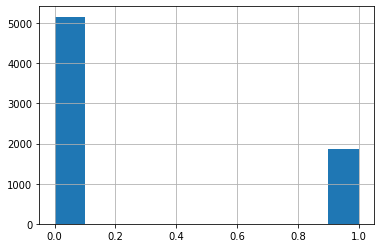

In [28]:
data_final['churn'].hist()

Más de 5,000 personas se quedaron y algo menos de 2,000 se marcharon.

- Voy a trazar gráficos para ver cómo se distribuye el churn entre las demás características

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


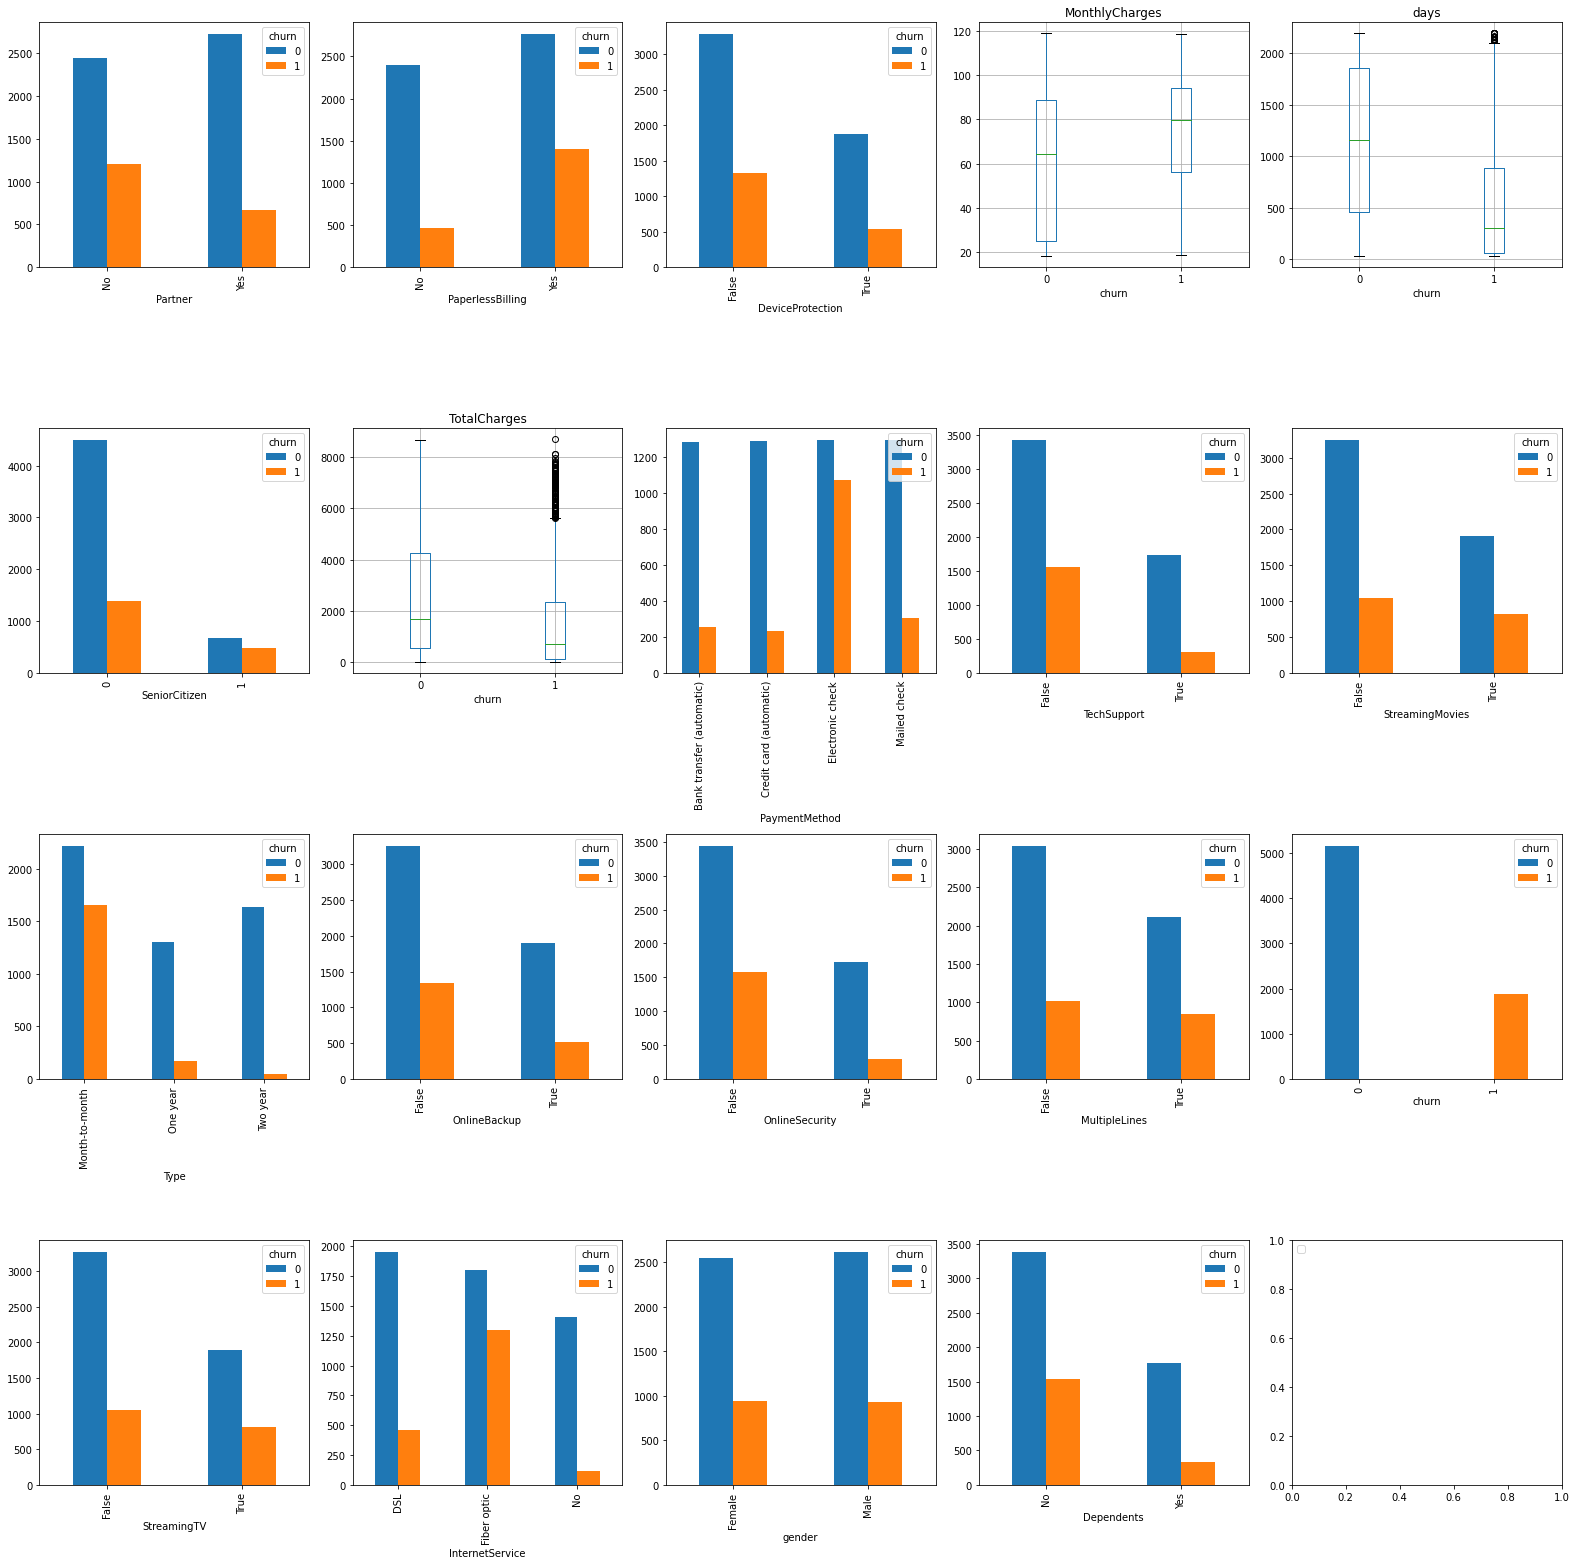

In [29]:
fig, axs = plt.subplots(4, len(data_final.columns) // 4, figsize=(22,22))
axs = axs.flatten()
cols=list(set(data_final.columns) - set(['customerID']))
for col, ax in zip(cols, axs):
    if data_final[col].dtype=='float64':
        data_final.boxplot(column=col, by='churn', ax=ax)
        plt.suptitle('')
    else:
        df = data_final.groupby([col, 'churn'])['churn'].count().unstack()
        df.plot(kind='bar', stacked=False, label='#churn (neg, pos)', ax=ax)
        plt.legend(loc='upper left')
    
plt.tight_layout()
plt.show()    

Analizando los datos, encontré algunas características comunes en los clientes que se dieron de baja:

- La mayoría prefería la facturación sin papel, especialmente mediante cheques electrónicos.
- Curiosamente, no predominaban las personas mayores entre los que se fueron.
- No tenían contratados uno o más de los servicios de internet que se ofrecen.
- Optaban por planes de pago mes a mes.

Sus facturas mensuales solían ser más elevadas, con una media de unos 80 USD. El diagrama de caja de "days" indica que eran usuarios relativamente nuevos (con algunas excepciones). Esto tiene sentido si tenemos en cuenta que, al no permanecer mucho tiempo, el total que pagaban era menor. Sin embargo, hay algunos valores atípicos en los datos que no puedo ignorar.

# Matriz de correlaciones

In [30]:
data_final.corr()

,MonthlyCharges,TotalCharges,churn,days
MonthlyCharges,1.000000,0.651065,0.192858,0.246715
TotalCharges,0.651065,1.000000,-0.199484,0.825811
churn,0.192858,-0.199484,1.000000,-0.354496
days,0.246715,0.825811,-0.354496,1.000000


- Revisando las características numéricas, no encontré ninguna con una fuerte correlación con la tasa de abandono. Sin embargo, sí observé una correlación bastante notable entre el número de días que un cliente estuvo con nosotros y el total que pagó en cuotas.

- En el siguiente paso, me enfocaré en las cuotas mensuales de los usuarios que tenían servicios de teléfono e internet. Compararé la distribución de estas cuotas entre los clientes que se dieron de baja y los que aún siguen con nosotros. Esto me ayudará a comprender mejor si existe alguna relación entre el precio y la cancelación del servicio.

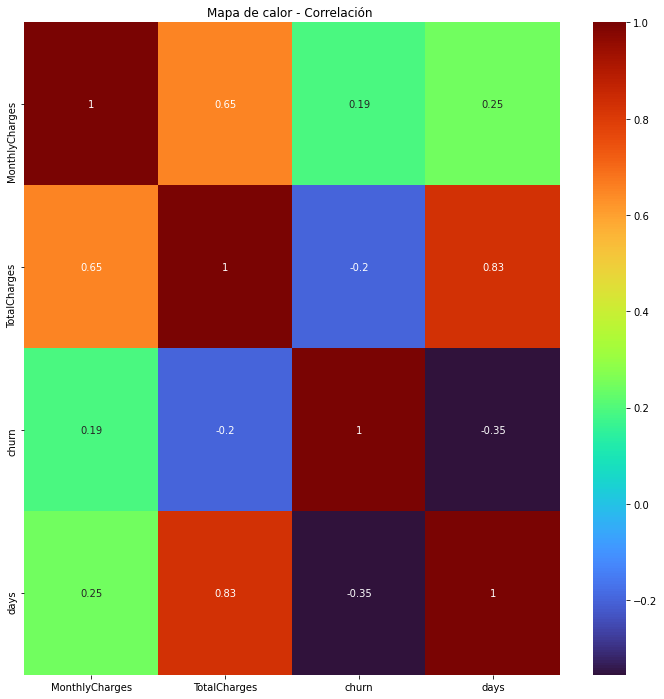

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(data_final.corr(), annot=True, cmap='turbo')
plt.title('Mapa de calor - Correlación ')
plt.show()

In [32]:
data_final.corr()['churn'].sort_values(ascending=False)

churn             1.000000
MonthlyCharges    0.192858
TotalCharges     -0.199484
days             -0.354496
Name: churn, dtype: float64

In [33]:
corr_df = data_final.corr()
corr_df.iloc[corr_df['churn'].abs().argsort()]["churn"]

MonthlyCharges    0.192858
TotalCharges     -0.199484
days             -0.354496
churn             1.000000
Name: churn, dtype: float64

In [34]:
phone_users=data_final[data_final['customerID'].isin(phone['customerID'])]
phone_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6352 entries, 1 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        6352 non-null   object  
 1   gender            6352 non-null   category
 2   SeniorCitizen     6352 non-null   category
 3   Partner           6352 non-null   category
 4   Dependents        6352 non-null   category
 5   Type              6352 non-null   category
 6   PaperlessBilling  6352 non-null   category
 7   PaymentMethod     6352 non-null   category
 8   MonthlyCharges    6352 non-null   float64 
 9   TotalCharges      6352 non-null   float64 
 10  churn             6352 non-null   int64   
 11  days              6352 non-null   float64 
 12  MultipleLines     6352 non-null   category
 13  InternetService   6352 non-null   category
 14  OnlineSecurity    6352 non-null   category
 15  OnlineBackup      6352 non-null   category
 16  DeviceProtection  6352 n

- Distribución de las tarifas mensuales entre los usuarios de teléfono

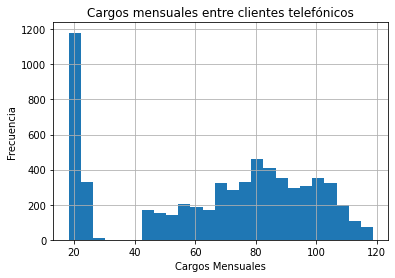

In [35]:
phone_users['MonthlyCharges'].hist(bins=25)
plt.xlabel('Cargos Mensuales')
plt.ylabel('Frecuencia')
plt.title('Cargos mensuales entre clientes telefónicos')
plt.show()

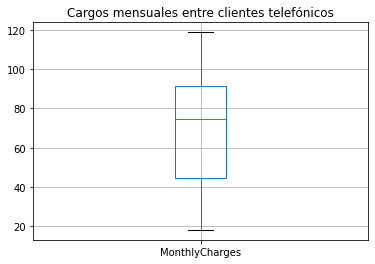

In [36]:
phone_users.boxplot(column='MonthlyCharges')
plt.title('Cargos mensuales entre clientes telefónicos')
plt.show()

In [37]:
phone_users['MonthlyCharges'].describe()

count    6352.000000
mean       67.239625
std        30.438439
min        18.250000
25%        44.787500
50%        74.700000
75%        91.250000
max       118.750000
Name: MonthlyCharges, dtype: float64

- Analizando las cuotas mensuales de los usuarios de telefonía, observo que un usuario típico paga entre 45 (percentil 25) y 91 (percentil 75) dólares. Sin embargo, el histograma revela un grupo considerable de personas (alrededor de 1.500) que pagan entre 20 y 30 dólares al mes. Ahora, es interesante comparar la distribución de estas cuotas entre los clientes que se dieron de baja y los que aún siguen.

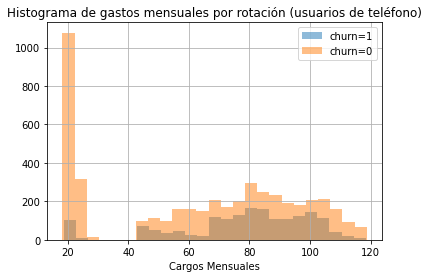

In [38]:
phone_users[phone_users['churn']==1]['MonthlyCharges'].hist(bins=25, alpha=0.5, label='churn=1')
phone_users[phone_users['churn']==0]['MonthlyCharges'].hist(bins=25, alpha=0.5, label='churn=0')
plt.legend(loc='upper right')
plt.xlabel('Cargos Mensuales')
plt.title('Histograma de gastos mensuales por rotación (usuarios de teléfono)')
plt.show()

- Las distribuciones son similares, aunque la de los que se marcharon es mucho menor

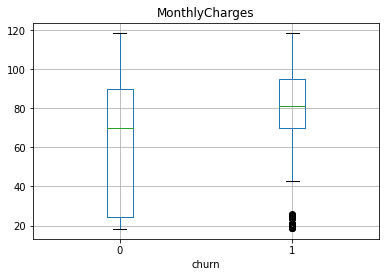

In [39]:
phone_users.boxplot(column='MonthlyCharges', by='churn')
plt.suptitle('')
plt.show()

- Parece ser que los que se marcharon pagaron cuotas mensuales más altas que los que se quedaron

In [40]:
print('Distribución mensual de los gastos de los que se fueron',
      phone_users[phone_users['churn']==1]['MonthlyCharges'].describe())


Distribución mensual de los gastos de los que se fueron count    1699.000000
mean       78.134255
std        22.567643
min        18.850000
25%        69.975000
50%        80.950000
75%        94.850000
max       118.350000
Name: MonthlyCharges, dtype: float64


In [41]:
print('Distribución mensual de los gastos de los que se quedaron',
      phone_users[phone_users['churn']==0]['MonthlyCharges'].describe())

Distribución mensual de los gastos de los que se quedaron count    4653.000000
mean       63.261552
std        31.934310
min        18.250000
25%        24.500000
50%        69.900000
75%        90.050000
max       118.750000
Name: MonthlyCharges, dtype: float64


- Los que se marcharon solían pagar entre 70 (percentil 25) y 95 dólares (percentil 75). Los que se quedaron pagaban entre 24 (percentil 25) y 90 dólares (percentil 75).

Subscriptores de Internet

In [42]:
internet_users=data_final[data_final['customerID'].isin(internet['customerID'])]
internet_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        5512 non-null   object  
 1   gender            5512 non-null   category
 2   SeniorCitizen     5512 non-null   category
 3   Partner           5512 non-null   category
 4   Dependents        5512 non-null   category
 5   Type              5512 non-null   category
 6   PaperlessBilling  5512 non-null   category
 7   PaymentMethod     5512 non-null   category
 8   MonthlyCharges    5512 non-null   float64 
 9   TotalCharges      5512 non-null   float64 
 10  churn             5512 non-null   int64   
 11  days              5512 non-null   float64 
 12  MultipleLines     5512 non-null   category
 13  InternetService   5512 non-null   category
 14  OnlineSecurity    5512 non-null   category
 15  OnlineBackup      5512 non-null   category
 16  DeviceProtection  5512 n

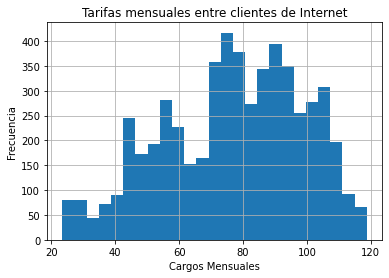

In [43]:
internet_users['MonthlyCharges'].hist(bins=25)
plt.xlabel('Cargos Mensuales')
plt.ylabel('Frecuencia')
plt.title('Tarifas mensuales entre clientes de Internet')
plt.show()

- Observo dos picos: uno en torno a 50 y otro en torno a 80. Está sesgado a la derecha

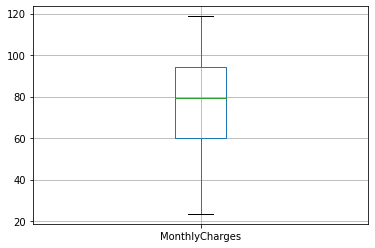

In [44]:
internet_users.boxplot(column='MonthlyCharges')
plt.show()

In [45]:
internet_users['MonthlyCharges'].describe()

count    5512.000000
mean       76.855053
std        21.929331
min        23.450000
25%        59.950000
50%        79.500000
75%        94.450000
max       118.750000
Name: MonthlyCharges, dtype: float64

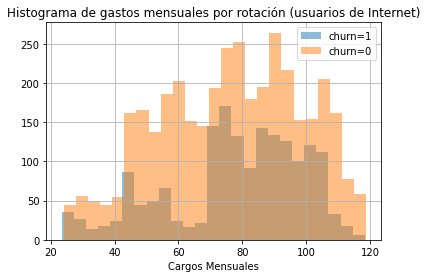

In [46]:
internet_users[internet_users['churn']==1]['MonthlyCharges'].hist(bins=25, alpha=0.5, label='churn=1')
internet_users[internet_users['churn']==0]['MonthlyCharges'].hist(bins=25, alpha=0.5, label='churn=0')
plt.legend(loc='upper right')
plt.xlabel('Cargos Mensuales')
plt.title('Histograma de gastos mensuales por rotación (usuarios de Internet)')
plt.show()

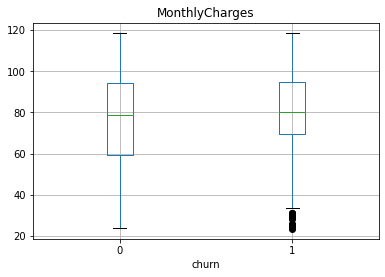

In [47]:
internet_users.boxplot(column='MonthlyCharges', by='churn')
plt.suptitle('')
plt.show()

In [48]:
print('Distribución mensual de los gastos para los que se fueron',
      internet_users[internet_users['churn']==1]['MonthlyCharges'].describe())

Distribución mensual de los gastos para los que se fueron count    1756.000000
mean       77.920985
std        21.144147
min        23.450000
25%        69.350000
50%        80.450000
75%        94.650000
max       118.350000
Name: MonthlyCharges, dtype: float64


In [49]:
print('Distribución mensual de los gastos para los que se quedaron',
      internet_users[internet_users['churn']==0]['MonthlyCharges'].describe())

Distribución mensual de los gastos para los que se quedaron count    3756.000000
mean       76.356709
std        22.272199
min        24.150000
25%        59.137500
50%        78.725000
75%        94.312500
max       118.750000
Name: MonthlyCharges, dtype: float64


Los que se marcharon pagaban entre 69 (percentil 25) y 95 dólares (percentil 75), mientras que los que se quedaron pagaban entre 59 (percentil 25) y 94 dólares (percentil 75).

- En conclusión, tanto para los usuarios de internet como para los de telefonía, se observa una tendencia clara: los que se dieron de baja pagaban, en promedio, cuotas mensuales más altas. Esta información es valiosa para comprender mejor los motivos que llevan a los clientes a cancelar su servicio.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
El trabajo realizado en la exploración inicial de los datos y su limpieza ha sido excepcional. Destaco especialmente cómo has utilizado la descripción de los percentiles para obtener conclusiones intermedias claras y acertadas. Este enfoque ha permitido una comprensión profunda de la distribución de los datos, lo cual es esencial para el análisis posterior y la construcción de modelos predictivos efectivos. Las conclusiones intermedias que has logrado a través de este análisis meticuloso proporcionan una base sólida para las recomendaciones y estrategias futuras.</div>


## Entrenamiento y Evaluación del Modelo

In [50]:
data_final=data_final.drop('customerID', axis=1)

- Elimino la columna customerID, ya que no será de utilidad.

Crearé dos conjuntos: uno para entrenar el modelo y otro para evaluar su rendimiento.

Como tenemos un desequilibrio de clases (es decir, no hay una distribución equitativa entre las diferentes categorías), utilizaré tres tipos de datos:

1. Codificación Ordinal y Escalado: En este caso, codificaré las variables categóricas de forma ordinal y escalaré todas las variables numéricas.

2. Codificación One-Hot y Escalado: Aquí, usaré la codificación one-hot para las variables categóricas y escalaré las variables numéricas.

3. Solo Escalado: En este tipo, solo escalaré todas las variables (tanto categóricas como numéricas) sin ninguna codificación.

Para solucionar el desequilibrio de clases, aplicaré una técnica de sobremuestreo a cada tipo de datos.

- Crearé una función llamada "upsample" que toma como argumentos las características, el objetivo y el número de repetición

In [51]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1] 
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_ups = pd.concat([features_zeros] + [features_ones] * repeat)
    target_ups = pd.concat([target_zeros] + [target_ones] * repeat)
    features_ups, target_ups = shuffle(features_ups, target_ups, random_state=12345)
    return features_ups, target_ups

- Codificación ordinal y escalada

In [52]:
data_mod=data_final.copy()
cat_feat = data_mod.columns[data_mod.dtypes=='category']
encoder=OrdinalEncoder()
data_mod[cat_feat]=encoder.fit_transform(data_mod[cat_feat])
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   float64
 1   SeniorCitizen     7032 non-null   float64
 2   Partner           7032 non-null   float64
 3   Dependents        7032 non-null   float64
 4   Type              7032 non-null   float64
 5   PaperlessBilling  7032 non-null   float64
 6   PaymentMethod     7032 non-null   float64
 7   MonthlyCharges    7032 non-null   float64
 8   TotalCharges      7032 non-null   float64
 9   churn             7032 non-null   int64  
 10  days              7032 non-null   float64
 11  MultipleLines     7032 non-null   float64
 12  InternetService   7032 non-null   float64
 13  OnlineSecurity    7032 non-null   float64
 14  OnlineBackup      7032 non-null   float64
 15  DeviceProtection  7032 non-null   float64
 16  TechSupport       7032 non-null   float64


- "features" serán todas las columnas excepto la columna churn, "target" será la columna churn

In [53]:
features=data_mod.drop('churn', axis=1)
target=data_mod['churn']
features_train, features_test, target_train, target_test=train_test_split(features, target,\
                                                                                      test_size=0.25,\
                                                                                     random_state=12345)
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(5274, 18)
(5274,)
(1758, 18)
(1758,)


In [54]:
target_train.value_counts(normalize=True)

0    0.733788
1    0.266212
Name: churn, dtype: float64

In [55]:
feat_ups, targ_ups = upsample(features_train, target_train, 3)
print(feat_ups.shape, targ_ups.shape)

(8082, 18) (8082,)


- Muestrea el conjunto de características de "target" y "features" introduciéndolos en la función upsample con una repetición, para poder imprimir las dimensiones de los conjuntos remuestreados

In [56]:
numeric = ['MonthlyCharges', 'TotalCharges', 'days']
scaler = StandardScaler()
scaler.fit(feat_ups[numeric])
feat_ups[numeric] = scaler.transform(feat_ups[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
feat_ups.head()

/tmp/ipykernel_795/3354536010.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_test[numeric] = scaler.transform(features_test[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

,gender,SeniorCitizen,Partner,Dependents,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,days,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1616,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.637200,0.452304,0.305534,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5677,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.591817,-0.702195,-0.896508,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
6137,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.092781,0.150571,-0.108351,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1681,0.0,0.0,1.0,1.0,0.0,1.0,2.0,-0.284435,-0.193608,-0.067372,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6142,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.097834,-0.624962,-0.774938,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Codificación One-Hot y Escalado

In [57]:
data_ohe=pd.get_dummies(data_final, drop_first=True)
data_ohe.head()

,MonthlyCharges,TotalCharges,churn,days,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,Type_One year,Type_Two year,...,PaymentMethod_Mailed check,MultipleLines_True,InternetService_Fiber optic,InternetService_No,OnlineSecurity_True,OnlineBackup_True,DeviceProtection_True,TechSupport_True,StreamingTV_True,StreamingMovies_True
0,29.85,29.85,0,31.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,56.95,1889.50,0,1036.0,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
2,53.85,108.15,1,61.0,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
3,42.30,1840.75,0,1371.0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,1,0,0
4,70.70,151.65,1,61.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [58]:
feat=data_ohe.drop('churn', axis=1)
target=data_ohe['churn']
f_train, f_test, t_train, t_test=train_test_split(feat, target,\
                                                                                      test_size=0.25,\
                                                                                     random_state=12345)
print(f_train.shape)
print(t_train.shape)
print(f_test.shape)
print(t_test.shape)

(5274, 22)
(5274,)
(1758, 22)
(1758,)


In [59]:
f_ohe, t_ohe = upsample(f_train, t_train, 3)
print(f_ohe.shape, t_ohe.shape)

(8082, 22) (8082,)


In [60]:
numeric = ['MonthlyCharges', 'TotalCharges', 'days']
scaler = StandardScaler()
scaler.fit(f_ohe[numeric])
f_ohe[numeric] = scaler.transform(f_ohe[numeric])
f_test[numeric] = scaler.transform(f_test[numeric])
f_ohe.head()

/tmp/ipykernel_795/1401385081.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_test[numeric] = scaler.transform(f_test[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,MonthlyCharges,TotalCharges,days,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,Type_One year,Type_Two year,PaperlessBilling_Yes,...,PaymentMethod_Mailed check,MultipleLines_True,InternetService_Fiber optic,InternetService_No,OnlineSecurity_True,OnlineBackup_True,DeviceProtection_True,TechSupport_True,StreamingTV_True,StreamingMovies_True
1616,0.637200,0.452304,0.305534,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,1,0
5677,0.591817,-0.702195,-0.896508,1,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
6137,1.092781,0.150571,-0.108351,0,0,0,0,0,0,1,...,0,0,1,0,0,1,1,0,1,1
1681,-0.284435,-0.193608,-0.067372,0,0,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
6142,0.097834,-0.624962,-0.774938,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Solo Escalado (sin codificación)

In [61]:
no_enc=data_final.copy()
feat=no_enc.drop('churn', axis=1)
target=no_enc['churn']
ft_train, ft_test, tr_train, tr_test=train_test_split(feat, target,\
                                                                                      test_size=0.25,\
                                                                                     random_state=12345)
print(ft_train.shape)
print(tr_train.shape)
print(ft_test.shape)
print(tr_test.shape)

(5274, 18)
(5274,)
(1758, 18)
(1758,)


In [62]:
f_ne, t_ne = upsample(ft_train, tr_train, 3)
print(f_ne.shape, t_ne.shape)

(8082, 18) (8082,)


In [63]:
numeric = ['MonthlyCharges', 'TotalCharges', 'days']
scaler = StandardScaler()
scaler.fit(f_ne[numeric])
f_ne[numeric] = scaler.transform(f_ne[numeric])
ft_test[numeric] = scaler.transform(ft_test[numeric])
f_ne.head()

/tmp/ipykernel_795/3690103288.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ft_test[numeric] = scaler.transform(ft_test[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,gender,SeniorCitizen,Partner,Dependents,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,days,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1616,Female,0,No,No,Month-to-month,Yes,Electronic check,0.637200,0.452304,0.305534,True,Fiber optic,False,False,False,False,True,False
5677,Male,1,No,No,Month-to-month,Yes,Bank transfer (automatic),0.591817,-0.702195,-0.896508,False,Fiber optic,True,False,False,False,True,False
6137,Female,0,No,No,Month-to-month,Yes,Electronic check,1.092781,0.150571,-0.108351,False,Fiber optic,False,True,True,False,True,True
1681,Female,0,Yes,Yes,Month-to-month,Yes,Electronic check,-0.284435,-0.193608,-0.067372,True,DSL,False,True,False,True,False,False
6142,Female,0,No,No,Month-to-month,No,Electronic check,0.097834,-0.624962,-0.774938,False,Fiber optic,False,False,False,False,False,False


- Regresión logística

In [64]:
lr = LogisticRegression(solver='liblinear')
lr_score=cross_val_score(lr, feat_ups, targ_ups, scoring='roc_auc', cv=5)
print(lr_score.mean())

0.836839486424871


In [65]:
lr = LogisticRegression(solver='liblinear')
lr_score=cross_val_score(lr, f_ohe, t_ohe, scoring='roc_auc', cv=5)
print(lr_score.mean())

0.8442112783213371


- Random Forest

Validación cruzada de Random Forest utilizando datos con codificación ordinal y escalada

In [66]:
for depth in range(21, 26):
    rf=RandomForestClassifier(n_estimators=40, max_depth=depth, random_state=12345)
    rf_score=cross_val_score(rf, feat_ups, targ_ups, scoring='roc_auc', cv=5)
    print('Max_depth', depth, 'score:', rf_score.mean())

Max_depth 21 score: 0.9794981497692191
Max_depth 22 score: 0.9792014508007542
Max_depth 23 score: 0.9789806589508052
Max_depth 24 score: 0.9794802267950187
Max_depth 25 score: 0.9791136162684507


Validación cruzada de Random Forest utilizando datos con codificación y escalado One-Hot

In [67]:
for depth in range(21, 26):
    rf=RandomForestClassifier(n_estimators=40, max_depth=depth, random_state=12345)
    rf_score=cross_val_score(rf, f_ohe, t_ohe, scoring='roc_auc', cv=5)
    print('Max_depth', depth, 'score:', rf_score.mean())

Max_depth 21 score: 0.9781700948225028
Max_depth 22 score: 0.9784966434508752
Max_depth 23 score: 0.9779276846260739
Max_depth 24 score: 0.9777353454316857
Max_depth 25 score: 0.9781898349034643


- CatBoost

Validación cruzada de CatBoost en datos con codificación ordinal y escalada

In [ ]:
cb=CatBoostClassifier(loss_function='Logloss',
                      learning_rate= 0.1,
                      random_seed=12345)
cb_score=cross_val_score(cb, feat_ups, targ_ups, scoring='roc_auc', cv=5)

0:	learn: 0.6413112	total: 49.8ms	remaining: 49.8s
1:	learn: 0.6087988	total: 53.5ms	remaining: 26.7s
2:	learn: 0.5821230	total: 57ms	remaining: 18.9s
3:	learn: 0.5630570	total: 60.3ms	remaining: 15s
4:	learn: 0.5468344	total: 63.7ms	remaining: 12.7s
5:	learn: 0.5319885	total: 67.4ms	remaining: 11.2s
6:	learn: 0.5192381	total: 71ms	remaining: 10.1s
7:	learn: 0.5097643	total: 74.5ms	remaining: 9.24s
8:	learn: 0.5025755	total: 77.9ms	remaining: 8.58s
9:	learn: 0.4934332	total: 81.5ms	remaining: 8.06s
10:	learn: 0.4875530	total: 84.9ms	remaining: 7.63s
11:	learn: 0.4823530	total: 88.3ms	remaining: 7.27s
12:	learn: 0.4783209	total: 91.7ms	remaining: 6.96s
13:	learn: 0.4719718	total: 95.8ms	remaining: 6.75s
14:	learn: 0.4659346	total: 99.7ms	remaining: 6.55s
15:	learn: 0.4619396	total: 104ms	remaining: 6.38s
16:	learn: 0.4587881	total: 108ms	remaining: 6.22s


In [ ]:
print(cb_score.mean())

Validación cruzada de CatBoost con datos escalados pero no codificados

In [ ]:
cat_feat=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner',
'Dependents', 'Type', 'PaperlessBilling', 'PaymentMethod']
cb=CatBoostClassifier(loss_function='Logloss',
                      learning_rate= 0.1,
                      random_seed=12345)
cb.fit(f_ne, t_ne, cat_features=cat_feat, verbose=False, plot=False)
cb_score=cross_val_score(cb, feat_ups, targ_ups, scoring='roc_auc', cv=5)

In [ ]:
print(cb_score.mean())

- LightGBM

Validación cruzada de LGBM en datos con codificación ordinal y escalada

In [ ]:
lgbm=LGBMClassifier(objective='binary',
                    learning_rate= 0.7,
                    random_state=12345)
lgbm_score=cross_val_score(lgbm, feat_ups, targ_ups, scoring='roc_auc', cv=5)
print(lgbm_score.mean())

Validación cruzada de LGBM con datos escalados pero no codificados

In [ ]:
lgbm=LGBMClassifier(objective='binary',
                    learning_rate= 0.6,
                    random_state=12345)
lgbm_score=cross_val_score(lgbm, f_ne, t_ne, scoring='roc_auc', cv=5)
print(lgbm_score.mean())

## Testing Final

In [ ]:
cat_feat=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner',
'Dependents', 'Type', 'PaperlessBilling', 'PaymentMethod']
cb=CatBoostClassifier(loss_function='Logloss',
                      learning_rate= 0.1,
                      random_seed=12345)
cb.fit(f_ne, t_ne, cat_features=cat_feat, verbose=False, plot=False)
pred=cb.predict(ft_test)
acc=accuracy_score(tr_test, pred)
probab=cb.predict_proba(ft_test)
auc=roc_auc_score(tr_test, probab[:,1])
print('AUC-ROC =', auc)
print('Exactitud  =', acc)

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Buen trabajo en tu proyecto. Pero podrías asegurarte al enviar que se carge esta sección con las celdas ejecutadas. esto nos ayuda mucho como revisores para no instalar paquetes adicionales y sobre todo porque los modelos de entrenamiento toman algo de tiempo en correr. 
</div>


## Conclusiones

Analicé los datos y descubrí que los clientes que se dieron de baja generalmente pagaban cuotas mensuales más altas. La mayoría de ellos también usaban métodos de pago electrónicos, por lo que este sistema podría ser un área a revisar.

Entrené cuatro modelos diferentes: Regresión Logística, Random Forest, CatBoost y LightGBM. Después de la validación cruzada, el modelo CatBoost obtuvo la mejor puntuación (0,98) en el conjunto de entrenamiento.

Luego, probé el modelo CatBoost en el conjunto de pruebas y obtuve una puntuación AUC-ROC de ~0,92 y una precisión de ~86%. Estos resultados son bastante buenos, lo que indica que el modelo CatBoost es capaz de predecir con precisión la probabilidad de que un cliente se dé de baja.

En base a estos hallazgos, puedo recomendar dos acciones:

- Revisar el sistema de pago electrónico, ya que es importante asegurarse de que el sistema funcione correctamente y que sea fácil de usar para los clientes. También se podría considerar ofrecer opciones de pago alternativas, como el pago en efectivo o con tarjeta de crédito.
- Realizar un análisis más profundo de los clientes que pagan cuotas altas, ya que es posible que haya otros factores que influyen en la decisión de estos clientes de cancelar el servicio, como la insatisfacción con el servicio al cliente o la falta de características que consideren importantes.

Además de estas recomendaciones, también se podrían implementar otras estrategias para reducir la tasa de churn:

- Ofrecer descuentos o promociones a los clientes que están considerando cancelar el servicio.
- Mejorar la comunicación con los clientes para asegurarse de que están satisfechos con el servicio.
- Implementar un programa de fidelización para recompensar a los clientes que permanecen con la empresa durante un período de tiempo determinado.

Es importante recordar que la tasa de churn es un indicador clave del rendimiento de una empresa. Al tomar medidas para reducir la tasa de churn, las empresas pueden mejorar su rentabilidad y aumentar la satisfacción de sus clientes.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
<strong>Lamentablemente, no podemos aprobar tu proyecto en este momento.</strong> Es importante que atiendas los siguientes puntos para asegurar que tu análisis cumpla con los estándares requeridos y pueda ser aprobado:<br><br>

- <strong>Selección de Características:</strong>
  <ul>
    <li>Implementa una etapa de selección de características antes de entrenar los modelos. Utiliza técnicas de filtrado básicas, como análisis de correlación, y explora métodos más avanzados (por ejemplo, Boruta y SHAP) para identificar las características más relevantes.</li>
    <li>Esta etapa es crucial para mejorar la precisión de tus modelos y evitar el overfitting.</li>
  </ul><br>


<strong>Te animo a revisar estos aspectos y realizar las correcciones necesarias.</strong> Recuerda que el proceso de aprendizaje está lleno de desafíos y superarlos es parte de tu formación como analista de datos. Estoy seguro de que, con estos ajustes, tu proyecto no solo cumplirá con los requisitos sino que también reflejará la calidad de tu trabajo y tu capacidad para realizar análisis de datos complejos. <strong>¡Ánimo y esperamos tu proyecto con las correcciones!</strong>
</div>


<div class="alert alert-block alert-info">
<b>Agradezco el feedback constructivo!
    <br> He agregado una tabla de contenido, que mejora la presentación y estructura del análisis.
    
Tienes razón en que la selección de características es crucial para el rendimiento del modelo, de hecho, ya he aplicado algunos enfoques iniciales, como un análisis de correlación y un mapa de calor, que han sido útiles para identificar variables altamente correlacionadas y posibles redundancias. Estos análisis complementan el filtrado y limpieza de datos que realicé desde el principio, antes del análisis exploratorio. Para mí, es más efectivo tener todo ordenado y limpio antes de profundizar en el análisis.
  <br>
    <br>He tratado de refinar aún más mi conjunto de características, eliminando variables redundantes o poco relevantes, para optimizar la precisión y eficiencia de los modelos.
   <br> 
    <br>Me he asegurado también que al enviarte el proyecto se cargen todas lase secciones con las celdas ejecutadas, mis disculpas por eso. Gracias!<br>
    </b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades por completar tu proyecto final con tal maestría! 🎉 **Tu proyecto ha sido exitosamente aprobado.**<br>
Tu compromiso y meticuloso enfoque en cada aspecto del análisis son realmente impresionantes.<br>
<br>Este logro marca un momento significativo en tu aprendizaje, demostrando no solo tu comprensión de los conceptos complejos, sino también tu capacidad para aplicarlos de manera práctica. Espero que este éxito impulse tu confianza y te inspire a seguir explorando y conquistando nuevos retos. ¡Sigue adelante con el excelente trabajo!
</div>